In [2]:
%load_ext autoreload
%autoreload 2 
from fibsem import utils, milling, acquire
from fibsem.microscope import FibsemMicroscope
from fibsem.structures import FibsemPatternSettings, FibsemPattern, FibsemImage, BeamType
import matplotlib
import matplotlib.pyplot as plt

In [5]:
img = FibsemImage.fromTescanFile(image_path=r"C:\Tescan\Tescan Essence Demo AMBER\users\supervisor\images\image_ChanA_000005.tif", metadata_path=r"C:\Tescan\Tescan Essence Demo AMBER\users\supervisor\images\image_ChanA_000005-tif.hdr", beam_type=BeamType.ION)

FibsemImageMetadata(image_settings=ImageSettings(resolution=[1242, 1536], dwell_time=3.2e-06, hfw=6.4687499586e-05, autocontrast=None, beam_type=<BeamType.ELECTRON: 1>, save=None, label='image_ChanA_000005', gamma_enabled=None, save_path=WindowsPath('C:/Tescan/Tescan Essence Demo AMBER/users/supervisor/images'), reduced_area=None), pixel_size=Point(x=5.2083333e-08, y=5.2083333e-08), microscope_state=MicroscopeState(timestamp=datetime.datetime(2023, 5, 17, 23, 53, 15), absolute_position=FibsemStagePosition(x=None, y=None, z=None, r=None, t=None, coordinate_system=None), eb_settings=BeamSettings(beam_type=<BeamType.ELECTRON: 1>, working_distance=None, beam_current=None, voltage=None, hfw=None, resolution=None, dwell_time=None, stigmation=None, shift=None), ib_settings=BeamSettings(beam_type=<BeamType.ION: 2>, working_distance=0.012, beam_current=2e-13, voltage=None, hfw=6.4687499586e-05, resolution=[1242, 1536], dwell_time=3.2e-06, stigmation=Point(x=0.0, y=0.0), shift=Point(x=-2.01e-06,

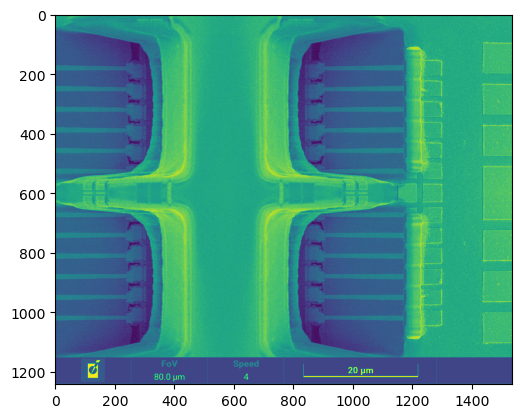

In [6]:
print(img.metadata)
fig, ax = plt.subplots()
ax.imshow(img.data)
plt.show()

In [13]:
microscope, settings = utils.setup_session(config_path= r"C:\Users\lnae0002\Desktop\fibsem\fibsem\config")


2023-03-16 10:58:48,696 — root — INFO — connect_to_microscope:420 — Microscope client connecting to [localhost:7520]
Client connecting to [localhost:7520]...
Client connected to [localhost:7520]
2023-03-16 10:58:48,702 — root — INFO — connect_to_microscope:422 — Microscope client connected to [localhost:7520]
2023-03-16 10:58:48,703 — root — INFO — setup_session:228 — Finished setup for session: demo_2023-03-16-10-58-48AM


In [16]:
microscope.acquire_image(settings.image)

NotImplementedError: The microscope does not have an electron beam.

In [ ]:
microscope.get_available_values("detector", beam_type= BeamType.ION)


In [ ]:

rectangle = FibsemPatternSettings(
    pattern = FibsemPattern.Rectangle,
    width = 10e-6,
    height = 10e-6,
    rotation = 0,
    centre_x = 0,
    centre_y = 0,
    depth = 1e-6,
)
#milling.draw_bitmap(microscope, rectangle, "C:\\Users\\lnae0002\\Desktop\\autolamella_test\\2\\000001\\Empty_ref.tif")
settings.image.beam_type = BeamType.ION
acquire.new_image(microscope, settings.image)


In [ ]:
milling.milling_protocol(
    microscope,
    settings.milling,
    patterning_mode= "Serial",
    patterns= [rectangle],
    drift_correction= True,
    image_settings = settings.image,
    ref_image = FibsemImage.load("C:\\Users\\lnae0002\\Desktop\\autolamella_test\\1\\000001\\Empty_ref.tif"),
)

In [ ]:
# microscope.connection.DrawBeam.UnloadLayer()
# layer = microscope.connection.DrawBeam.Layer("Layer1")
# print(layer)
microscope.connection.Detector.GetConfiguration(0)

In [ ]:
key = "detector_type"
value = "MD"

microscope.set(key, value, BeamType.ELECTRON)
eb = acquire.new_image(microscope, settings.image)
settings.image.beam_type = BeamType.ION
microscope.set(key, value, BeamType.ION)
ib = acquire.new_image(microscope, settings.image)
fig, ax = plt.subplots(1, 2, figsize=(10, 7))
ax[0].imshow(eb.data, cmap="gray")
ax[0].set_title("Electron Image 01")
ax[1].imshow(ib.data, cmap="gray")
ax[1].set_title("Ion Image 01")
plt.show()